**Q1. What is the main difference between the Euclidean distance metric and the Manhattan distance
metric in KNN? How might this difference affect the performance of a KNN classifier or regressor?**

**ANSWER:--------**


The main difference between the Euclidean distance metric and the Manhattan distance metric in the context of K-Nearest Neighbors (KNN) lies in how they measure the distance between two points in a multi-dimensional space.

### Euclidean Distance
- **Formula**: The Euclidean distance between two points \( p = (p_1, p_2, \ldots, p_n) \) and \( q = (q_1, q_2, \ldots, q_n) \) is given by:
  \[
  d_{Euclidean}(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \ldots + (p_n - q_n)^2}
  \]
- **Characteristics**: This is the straight-line distance between two points in Euclidean space, akin to "as-the-crow-flies".

### Manhattan Distance
- **Formula**: The Manhattan distance (also known as L1 distance or Taxicab distance) between two points \( p \) and \( q \) is given by:
  \[
  d_{Manhattan}(p, q) = |p_1 - q_1| + |p_2 - q_2| + \ldots + |p_n - q_n|
  \]
- **Characteristics**: This is the sum of the absolute differences of their Cartesian coordinates. It reflects the distance you would travel along axes at right angles (like navigating a grid of city streets).

### Impact on KNN Classifier or Regressor Performance
1. **Sensitivity to Outliers**:
   - **Euclidean Distance**: More sensitive to outliers because it squares the differences in each dimension.
   - **Manhattan Distance**: Less sensitive to outliers because it uses the absolute differences.

2. **Scale of Features**:
   - **Euclidean Distance**: Heavily influenced by the scale of features. Larger ranges can dominate the distance measure, making it essential to normalize or standardize features.
   - **Manhattan Distance**: Still influenced by the scale, but typically less so compared to Euclidean distance.

3. **Dimensionality**:
   - **Euclidean Distance**: The relative distance between points can become less meaningful as the number of dimensions increases (curse of dimensionality). Distances tend to become more similar in high dimensions.
   - **Manhattan Distance**: Also affected by high dimensionality, but can sometimes handle high-dimensional data slightly better than Euclidean distance.

4. **Performance on Different Data Structures**:
   - **Euclidean Distance**: Works well when the data points are clustered in spherical shapes.
   - **Manhattan Distance**: Works better with data points aligned in grid-like or block-like structures.

### Practical Implications
- When using KNN, the choice of distance metric can significantly impact the classifier or regressor's performance.
- For datasets with outliers or features with different scales, Manhattan distance might provide better performance.
- For datasets where the underlying data distribution is closer to spherical clusters, Euclidean distance might be more appropriate.
- It is often a good practice to experiment with both distance metrics and possibly other distance metrics to determine which one works best for the specific dataset and problem at hand.

### Example
Consider a dataset with two features, \( x \) and \( y \):

- If \( x \) and \( y \) are measured on vastly different scales, Euclidean distance might be dominated by the feature with the larger range unless the data is normalized.
- If the data points form clusters in a grid-like pattern, Manhattan distance might better capture the true relationships between points.

In summary, the choice between Euclidean and Manhattan distance metrics can influence the KNN model's sensitivity to outliers, handling of different feature scales, and performance in various data structures.

**Q2. How do you choose the optimal value of k for a KNN classifier or regressor? What techniques can be
used to determine the optimal k value?**

**ANSWER:--------**


Choosing the optimal value of \( k \) for a K-Nearest Neighbors (KNN) classifier or regressor is crucial for achieving good model performance. Here are some common techniques and considerations for selecting the optimal \( k \) value:

### Techniques for Choosing the Optimal \( k \)

1. **Cross-Validation**:
   - **k-Fold Cross-Validation**: This technique involves splitting the dataset into \( k \) folds, training the model \( k \) times, each time using a different fold as the validation set and the remaining \( k-1 \) folds as the training set. The performance metrics (e.g., accuracy for classification, mean squared error for regression) are averaged over all folds. This process is repeated for different values of \( k \) (the KNN parameter), and the \( k \) value with the best average performance is chosen.
   - **Leave-One-Out Cross-Validation (LOOCV)**: This is a special case of k-fold cross-validation where \( k \) is equal to the number of data points. Each data point is used once as the validation set, and the model is trained on the remaining data. This method can be computationally expensive but is very thorough.

2. **Grid Search**:
   - **Grid Search**: This involves specifying a range of \( k \) values and systematically evaluating the performance of the KNN model for each value using cross-validation. The \( k \) value that yields the best performance metric is selected as the optimal \( k \).

3. **Heuristic Methods**:
   - **Rule of Thumb**: A common heuristic is to set \( k \) to the square root of the number of data points (\( n \)). For example, if you have 100 data points, you might start with \( k = \sqrt{100} \approx 10 \).
   - **Domain Knowledge**: Sometimes, domain-specific insights can guide the choice of \( k \). For example, in a particular application, it might be known that a certain neighborhood size is more appropriate.

4. **Elbow Method**:
   - **Elbow Method**: This method involves plotting the performance metric (e.g., accuracy, error rate) against different \( k \) values. The plot often shows an "elbow" point where the performance metric starts to level off. The \( k \) value at the elbow point is chosen as it balances model complexity and performance.

### Practical Considerations

1. **Odd vs. Even \( k \)**:
   - For classification tasks, it's often beneficial to choose an odd \( k \) value to avoid ties in the voting process.

2. **Bias-Variance Trade-off**:
   - **Small \( k \)**: Can lead to a high variance model that overfits the training data (too sensitive to noise and outliers).
   - **Large \( k \)**: Can lead to a high bias model that underfits the training data (oversmooths the decision boundary, missing important patterns).
   - Optimal \( k \): Balances bias and variance to achieve good generalization on unseen data.

3. **Computational Cost**:
   - Larger \( k \) values require more distance computations, which can be computationally expensive for large datasets.

### Steps to Determine the Optimal \( k \)

1. **Divide the dataset**: Split the dataset into training and validation sets (or use cross-validation).
2. **Select a range of \( k \) values**: Choose a range of \( k \) values to evaluate.
3. **Evaluate performance**: Use cross-validation to assess the performance of the KNN model for each \( k \) value.
4. **Plot performance**: Optionally, plot the performance metric against \( k \) values to visually inspect the optimal \( k \).
5. **Choose the best \( k \)**: Select the \( k \) value that provides the best performance on the validation set.



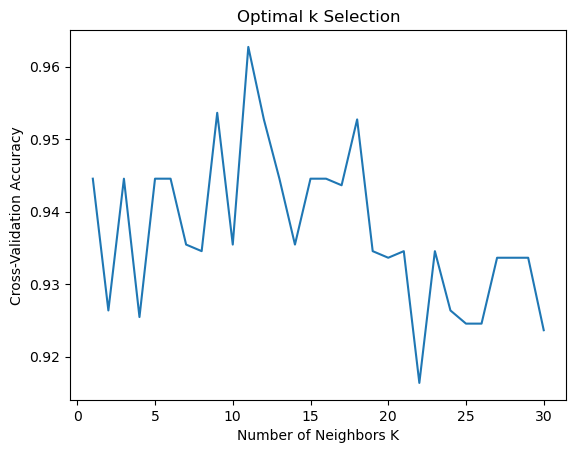

The optimal number of neighbors is: 11


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # Example dataset

# Load example dataset (replace this with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Example range of k values
k_values = range(1, 31)

# List to store cross-validation scores
cv_scores = []

# Evaluate each k value using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the cross-validation scores
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal k Selection')
plt.show()

# Find the optimal k
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is:", optimal_k)


**Q3. How does the choice of distance metric affect the performance of a KNN classifier or regressor? In
what situations might you choose one distance metric over the other?**

**ANSWER:--------**


The choice of distance metric can significantly impact the performance of a K-Nearest Neighbors (KNN) classifier or regressor, as it determines how the distance between data points is calculated. Different distance metrics can capture different aspects of the data's structure and relationships. Here are some common distance metrics and their characteristics:

### Common Distance Metrics

1. **Euclidean Distance**:
   - **Formula**: \( d_{Euclidean}(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \ldots + (p_n - q_n)^2} \)
   - **Characteristics**: Measures the straight-line distance between points. Sensitive to the scale of features and outliers.

2. **Manhattan Distance**:
   - **Formula**: \( d_{Manhattan}(p, q) = |p_1 - q_1| + |p_2 - q_2| + \ldots + |p_n - q_n| \)
   - **Characteristics**: Measures distance as the sum of absolute differences. Less sensitive to outliers and better for grid-like data structures.

3. **Minkowski Distance**:
   - **Formula**: \( d_{Minkowski}(p, q) = \left( \sum_{i=1}^{n} |p_i - q_i|^m \right)^{1/m} \)
   - **Characteristics**: Generalizes Euclidean (m=2) and Manhattan (m=1) distances. Allows flexibility with the parameter \( m \).

4. **Chebyshev Distance**:
   - **Formula**: \( d_{Chebyshev}(p, q) = \max(|p_1 - q_1|, |p_2 - q_2|, \ldots, |p_n - q_n|) \)
   - **Characteristics**: Measures the maximum difference along any dimension. Suitable for situations where different dimensions are not comparable.

5. **Cosine Similarity**:
   - **Formula**: \( \text{cosine similarity}(p, q) = \frac{p \cdot q}{\|p\| \|q\|} \)
   - **Characteristics**: Measures the cosine of the angle between two vectors. Useful for text data and high-dimensional sparse data.

### Impact on Performance

1. **Sensitivity to Scale**:
   - **Euclidean Distance**: Sensitive to the scale of features. Features with larger scales can dominate the distance calculation, potentially skewing the results. It is often necessary to normalize or standardize features.
   - **Manhattan Distance**: Less sensitive to the scale of features compared to Euclidean distance, but still affected.

2. **Handling Outliers**:
   - **Euclidean Distance**: More sensitive to outliers due to the squaring of differences.
   - **Manhattan Distance**: Less sensitive to outliers as it uses absolute differences.

3. **Dimensionality**:
   - **Euclidean Distance**: Can suffer from the curse of dimensionality where distances become less meaningful as the number of dimensions increases.
   - **Manhattan Distance**: Also affected by high dimensionality, but often less so compared to Euclidean distance.

4. **Data Structure**:
   - **Euclidean Distance**: Works well when data points are clustered in spherical shapes.
   - **Manhattan Distance**: Works better with data points aligned in grid-like or block-like structures.

### Situations to Choose One Metric Over Another

1. **Euclidean Distance**:
   - Use when the features are on similar scales or have been normalized.
   - Suitable for problems where the data points form spherical clusters.
   - Preferred when there are no significant outliers.

2. **Manhattan Distance**:
   - Use when dealing with data that has grid-like structures or when features are not on similar scales.
   - More robust to outliers and better for high-dimensional data.
   - Preferred when features represent different units or scales.

3. **Minkowski Distance**:
   - Use when you want flexibility between Euclidean and Manhattan distances.
   - Can be tuned by adjusting the parameter \( m \).

4. **Chebyshev Distance**:
   - Use when the maximum difference along any dimension is more important than the overall distance.
   - Suitable for applications like chessboard distances.

5. **Cosine Similarity**:
   - Use for text data, document similarity, or high-dimensional sparse data.
   - Preferred when the direction of the data points is more important than their magnitude.



In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load example dataset (replace with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for Euclidean distance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
k = 5  # Example k value

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    print(f"Distance Metric: {metric}, Cross-Validation Accuracy: {np.mean(scores):.4f}")

# Output the results


Distance Metric: euclidean, Cross-Validation Accuracy: 0.9264
Distance Metric: manhattan, Cross-Validation Accuracy: 0.9173
Distance Metric: chebyshev, Cross-Validation Accuracy: 0.9345


**Q4. What are some common hyperparameters in KNN classifiers and regressors, and how do they affect
the performance of the model? How might you go about tuning these hyperparameters to improve
model performance?**

**ANSWER:--------**


In K-Nearest Neighbors (KNN) classifiers and regressors, several hyperparameters can be tuned to optimize model performance. The most common hyperparameters include:

1. **Number of Neighbors (k)**:
   - **Description**: The number of nearest neighbors to consider when making a prediction.
   - **Effect**:
     - Small \( k \): Can lead to a high-variance model that overfits the training data (too sensitive to noise and outliers).
     - Large \( k \): Can lead to a high-bias model that underfits the training data (oversmooths the decision boundary, missing important patterns).
   - **Tuning**: Use cross-validation to find the optimal \( k \) by evaluating the model's performance for a range of \( k \) values.

2. **Distance Metric**:
   - **Description**: The method used to measure the distance between data points. Common metrics include Euclidean, Manhattan, Minkowski, and Chebyshev distances.
   - **Effect**:
     - The choice of distance metric can significantly impact the model's sensitivity to feature scales, outliers, and the data's geometric structure.
   - **Tuning**: Experiment with different distance metrics and use cross-validation to determine which metric performs best for your data.

3. **Weighting of Neighbors**:
   - **Description**: Determines how the influence of neighbors is weighted. Common options are 'uniform' (equal weight to all neighbors) and 'distance' (weight inversely proportional to the distance).
   - **Effect**:
     - Uniform: Can work well if all neighbors are equally reliable.
     - Distance: Can improve performance if closer neighbors are more reliable indicators of the target value.
   - **Tuning**: Compare the performance of different weighting schemes using cross-validation.

4. **Algorithm for Nearest Neighbors Search**:
   - **Description**: The algorithm used to find the nearest neighbors. Options include 'auto', 'ball_tree', 'kd_tree', and 'brute'.
   - **Effect**:
     - Affects the efficiency and speed of the nearest neighbors search, especially for large datasets.
   - **Tuning**: The default 'auto' option attempts to select the best algorithm based on the input data. You can manually specify the algorithm and compare the computational efficiency and model performance.

5. **Leaf Size (for tree-based algorithms)**:
   - **Description**: The leaf size parameter for tree-based search algorithms like BallTree or KDTree.
   - **Effect**:
     - Smaller leaf size: More precise but can be slower.
     - Larger leaf size: Faster but may be less precise.
   - **Tuning**: Experiment with different leaf sizes to balance precision and computation time.

### Tuning Hyperparameters

1. **Grid Search**:
   - Use `GridSearchCV` from scikit-learn to systematically evaluate a range of hyperparameter values.

2. **Random Search**:
   - Use `RandomizedSearchCV` to randomly sample hyperparameter values from specified distributions. This can be more efficient than grid search for large parameter spaces.
   - Example:

3. **Bayesian Optimization**:
   - Use libraries like `scikit-optimize` or `hyperopt` to perform Bayesian optimization, which builds a probabilistic model of the objective function and uses it to select the most promising hyperparameters to evaluate.
 
By systematically tuning these hyperparameters and evaluating their impact on model performance, you can find the optimal settings for your KNN classifier or regressor, improving its accuracy and generalization on unseen data.

In [7]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load example dataset (replace with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'weights': ['uniform', 'distance']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9627272727272727


In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_neighbors': randint(1, 31),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'weights': ['uniform', 'distance']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform random search with cross-validation
random_search = RandomizedSearchCV(knn, param_dist, n_iter=100, cv=10, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9627272727272727


In [ ]:
# Install scikit-optimize if not already installed
# !pip install scikit-optimize

from skopt import BayesSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load example dataset (replace with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter space
param_space = {
    'n_neighbors': (1, 31),
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'weights': ['uniform', 'distance']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform Bayesian optimization with cross-validation
bayes_search = BayesSearchCV(knn, param_space, n_iter=100, cv=10, scoring='accuracy', random_state=42)
bayes_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", bayes_search.best_params_)
print("Best Cross-Validation Accuracy:", bayes_search.best_score_)


**Q5. How does the size of the training set affect the performance of a KNN classifier or regressor? What
techniques can be used to optimize the size of the training set?**

**ANSWER:--------**


The size of the training set can significantly impact the performance of a K-Nearest Neighbors (KNN) classifier or regressor. Here are the key points regarding how the training set size affects KNN performance and techniques to optimize it:

### Effects of Training Set Size on KNN Performance

1. **Performance Improvement with More Data**:
   - **More Representative**: A larger training set is more likely to capture the underlying distribution of the data, making the model more representative and accurate.
   - **Reduced Overfitting**: With more data, the model is less likely to overfit, as it has a broader range of examples to learn from.

2. **Computational Complexity**:
   - **Increased Computational Cost**: KNN has a high computational cost for both training and prediction since it involves calculating distances to all training points. Larger training sets will increase this cost.
   - **Memory Usage**: A larger dataset requires more memory to store, which might be a limitation in some applications.

3. **Dimensionality and Curse of Dimensionality**:
   - **High-Dimensional Data**: If the dataset has many features (high dimensionality), a large training set can help mitigate the curse of dimensionality by providing more samples for each dimension.
   - **Sparsity**: In high-dimensional spaces, data becomes sparse, and a larger training set can help ensure that the nearest neighbors are truly close in a meaningful way.

### Techniques to Optimize the Size of the Training Set

1. **Cross-Validation**:
   - **K-Fold Cross-Validation**: Use k-fold cross-validation to evaluate model performance across different subsets of the data. This helps in understanding how well the model generalizes and can guide decisions on training set size.
   - **Learning Curves**: Plot learning curves to visualize the relationship between training set size and model performance. This can show whether adding more data is likely to improve performance.

2. **Data Augmentation**:
   - **Synthetic Data**: Generate synthetic data to augment the training set, especially in cases where obtaining more real data is challenging. Techniques include SMOTE for imbalanced datasets or various transformations for image data.

3. **Feature Selection and Dimensionality Reduction**:
   - **Reduce Feature Space**: Use techniques like Principal Component Analysis (PCA) or feature selection methods to reduce the dimensionality of the data, which can help in making the model more efficient and less prone to the curse of dimensionality.
   - **Remove Redundant Features**: Identify and remove features that do not contribute significantly to the model's performance.

4. **Subsampling**:
   - **Random Subsampling**: Randomly select a subset of the training data to reduce computational costs. This can be useful when the dataset is extremely large, but care must be taken to ensure the subset is representative.
   - **Stratified Sampling**: Ensure that the subsample maintains the same distribution of classes or target values as the full dataset, especially in classification problems with imbalanced classes.

5. **Instance Selection**:
   - **Prototype Selection**: Use algorithms to select a subset of representative instances (prototypes) from the training set. Techniques include Condensed Nearest Neighbor (CNN) or Reduced Nearest Neighbor (RNN).
   - **Editing Algorithms**: Remove instances that are likely to be noise or outliers. Edited Nearest Neighbor (ENN) is an example of such an approach.


By analyzing the learning curve, you can determine if adding more data is likely to improve the model's performance. If the cross-validation score continues to increase with more training data, obtaining additional data may be beneficial. If the curve plateaus, further data may not significantly enhance performance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load example dataset (replace with your dataset)
data = load_iris()
X = data.data
y = data.target

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (KNN)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.grid()

# Plot the average training and test scores with fill_between for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


**Q6. What are some potential drawbacks of using KNN as a classifier or regressor? How might you
overcome these drawbacks to improve the performance of the model?**

**ANSWER:--------**


K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm, but it has several potential drawbacks. Here are some common issues and strategies to overcome them to improve model performance:

### Potential Drawbacks of KNN

1. **Computational Complexity**:
   - **Issue**: KNN requires calculating the distance between the query point and all points in the training set, which can be computationally expensive for large datasets.
   - **Solution**:
     - **Efficient Data Structures**: Use data structures like KD-Trees or Ball Trees to speed up nearest neighbor searches.
     - **Approximate Nearest Neighbors**: Use algorithms like Locality Sensitive Hashing (LSH) to approximate the nearest neighbors more quickly.

2. **Memory Usage**:
   - **Issue**: KNN stores the entire training dataset in memory, which can be problematic for large datasets.
   - **Solution**:
     - **Dimensionality Reduction**: Apply techniques like Principal Component Analysis (PCA) or t-SNE to reduce the number of features.
     - **Instance Selection**: Use methods like Condensed Nearest Neighbor (CNN) or Edited Nearest Neighbor (ENN) to reduce the size of the training set by keeping only representative examples.

3. **Sensitivity to Irrelevant Features**:
   - **Issue**: KNN is sensitive to the presence of irrelevant or redundant features, which can negatively impact performance.
   - **Solution**:
     - **Feature Selection**: Use methods like recursive feature elimination or mutual information to select the most relevant features.
     - **Feature Scaling**: Standardize or normalize features to ensure they contribute equally to the distance calculation.

4. **Curse of Dimensionality**:
   - **Issue**: In high-dimensional spaces, the distance between points becomes less meaningful, and the model's performance can degrade.
   - **Solution**:
     - **Dimensionality Reduction**: Reduce the number of features using PCA, LDA, or other dimensionality reduction techniques.
     - **Feature Engineering**: Create new features that capture important information and reduce the dimensionality of the dataset.

5. **Class Imbalance**:
   - **Issue**: KNN can be biased towards the majority class in imbalanced datasets.
   - **Solution**:
     - **Resampling Techniques**: Use oversampling (e.g., SMOTE) or undersampling to balance the class distribution.
     - **Weighted KNN**: Assign weights to neighbors based on their class to give more importance to minority class examples.

6. **Noise Sensitivity**:
   - **Issue**: KNN is sensitive to noise and outliers in the training data.
   - **Solution**:
     - **Noise Filtering**: Use techniques like Edited Nearest Neighbor (ENN) to remove noisy instances from the training set.
     - **Robust Distance Metrics**: Use distance metrics that are less sensitive to outliers, such as Mahalanobis distance.

### Strategies to Improve KNN Performance

1. **Use Cross-Validation**:
   - Perform cross-validation to select optimal hyperparameters (e.g., number of neighbors, distance metric) and evaluate the model's performance.

2. **Optimize Hyperparameters**:
   - Use techniques like Grid Search, Randomized Search, or Bayesian Optimization to find the best hyperparameters.

3. **Combine with Other Models**:
   - **Ensemble Methods**: Combine KNN with other models in an ensemble (e.g., voting classifiers) to improve robustness and accuracy.
   - **Hybrid Models**: Use KNN in conjunction with other algorithms, such as using KNN for initial neighbor search followed by a more complex model for final prediction.


By addressing these potential drawbacks and employing various techniques to optimize the training process, you can significantly improve the performance of a KNN classifier or regressor.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Load example dataset (replace with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline with feature scaling and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'knn__n_neighbors': range(1, 31),
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev'],
    'knn__weights': ['uniform', 'distance']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
